In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import sys
from sklearn.cluster import KMeans

In [2]:
# Remove the outliers
def remove_outliers(file_path):
    # return the list of dataframes
    dataframe_lists = []
    # Creating the dataframe and selecting the required columns
    for i in range(10):
        df = pd.read_csv(file_path, usecols=[1,2,3,4], skiprows=i*72000, nrows = 72000, names=["lz","X","Y","Z"])
        df['radiusSquare'] = df['X']*df['X']+df['Y']*df['Y']+df['Z']*df['Z']
        df['radius'] = np.sqrt(df['radiusSquare']).round(1)
        df['freq'] = df.groupby(['lz','radius'])['radius'].transform('count')
        for j in range(64):
            maxfreq = df[(df['lz']==j) & (df['radius']!=0)]['freq'].max()
            while maxfreq>100:
                df.drop(df[(df['lz']==j) & (df['freq']==maxfreq)].index, inplace=True)
                maxfreq = df[(df['lz']==j) & (df['radius']!=0)]['freq'].max()
                df.drop(df[(df['lz']==j) & (df['radius']==0)].index, inplace=True)
        dataframe_lists.append(df.iloc[:,1:4])
    return dataframe_lists

In [3]:
# atm = remove_outliers("/home/kia/Collected-Datasets/DEBS2019/debs2019_initial_dataset/Atm/in.csv")

# This the second data set that contains multiple objects
allData= remove_outliers("/home/kia/Collected-Datasets/DEBS2019/debs2019_dataset2/in.csv")

for i in range(10):
    print(allData[i]['X'].min() , allData[i]['X'].max())
    print(allData[i]['Z'].min() , allData[i]['Z'].max())
# min is -120  and max is 120 


-110.079773 99.703156
-119.380234 116.802673
-115.195 112.836441
-108.420158 110.719475
-94.480522 101.148933
-119.451668 118.771019
-115.498901 116.871895
-84.508873 88.650444
-113.325226 119.297836
-84.508873 113.46001399999999
-118.925529 88.583054
-119.597282 88.650444
-119.80186499999999 116.199532
-94.16327700000001 110.686752
-118.792603 93.706863
-119.126976 117.38418600000001
-111.93838500000001 119.624825
-119.00476100000002 116.842735
-112.967575 114.216225
-116.169785 118.374329


In [4]:
def isInt(value):
    try:
        int(value)
        return True
    except:
        return False


numOfObjects = []

# Out put data.
# We need to get the number of objects. 
pathOutput="/home/kia/Collected-Datasets/DEBS2019/debs2019_dataset2/out.csv"

with open(pathOutput) as fp:  
   line = fp.readline()
   cnt = 1
   while line:
    # print("Line {}: {}".format(cnt, line.strip()))
        lineArr=line.split(",")
        num = 0
        for index in range(1, len(lineArr)):
            if(isInt(lineArr[index])):
               num +=int(lineArr[index])
        numOfObjects.append(num)
        #print(line.split(",")[1])
        line = fp.readline()
        cnt += 1
        
        
        
print(max(numOfObjects))

50


dict_values([1, 641, 157, 5, 1, 2, 3, 4, 4, 1, 1, 1, 1, 1, 607, 7, 3, 1, 1, 2, 2, 3, 1, 1, 1, 2, 69, 1, 1, 2, 2, 19, 1, 1, 1, 1, 4, 3, 3, 3, 1, 1, 1, 3, 24, 1, 1, 4, 2, 1, 2, 81, 6, 2, 25, 442, 1, 1, 45, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 50, 3, 3, 5, 1, 3, 4, 1, 1, 2, 2, 1, 1, 2, 3, 7, 119, 4, 4, 1, 1, 1, 5, 6, 147, 1, 2, 2, 3, 1, 1, 1, 2, 1, 67, 3, 1, 5, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 16, 31, 1, 1, 3, 2, 1, 1, 1, 1, 1, 28, 1, 2, 1, 1, 1, 1, 1, 16, 1, 3, 272, 57, 3, 1, 1, 3, 1, 1, 1, 4, 1, 1, 2, 1, 1, 104, 3, 6, 29, 210, 1, 1, 1, 1, 1, 3, 1, 2, 2, 3, 4, 2, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 50, 21, 223, 5, 2, 1, 1, 4, 43, 5, 35, 73, 3, 8, 2, 4, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 20, 1, 1, 4, 14, 191, 1, 2, 4, 3, 145, 3, 1, 3, 4, 1, 5, 2, 1, 1, 1, 9, 1, 1, 1, 1, 1, 2, 78, 5, 1, 1, 1, 1, 1, 1, 12, 30, 2, 1, 1, 1, 1, 5, 14, 2, 2, 27, 7, 498, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 3, 2, 1, 2, 3, 5, 1, 4, 52, 22, 14, 4, 3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 192, 11, 8,

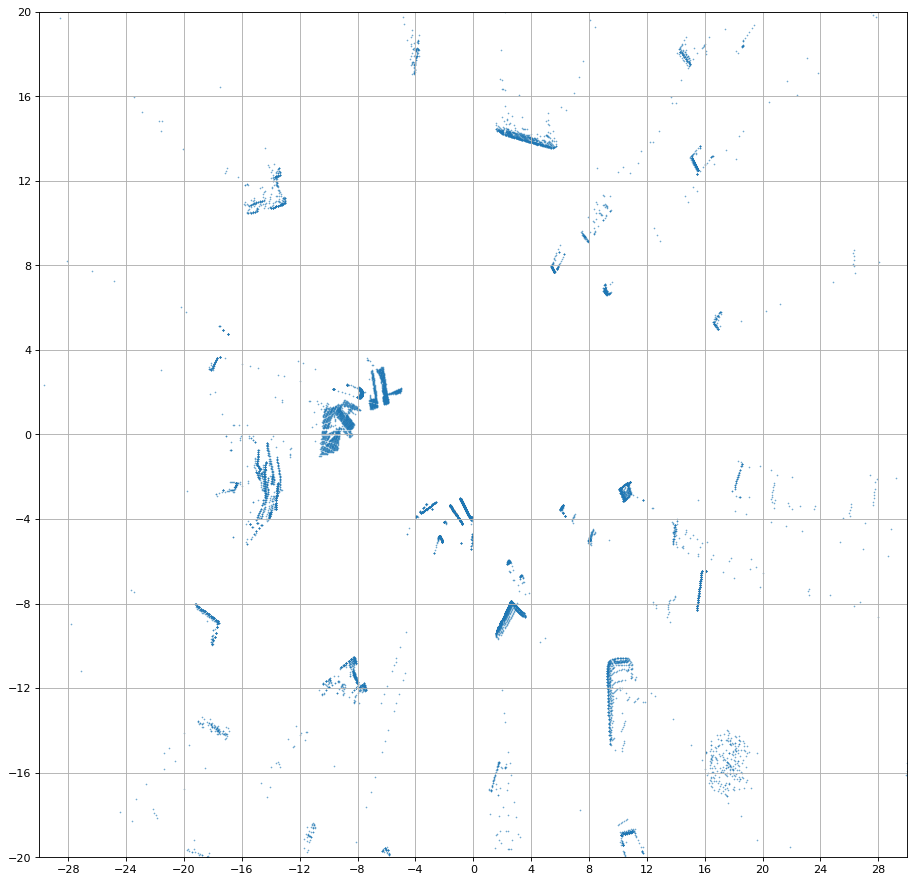

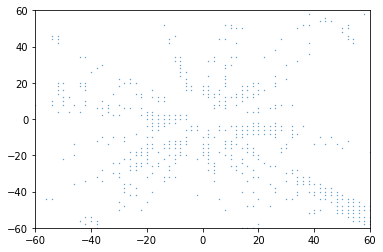

In [8]:
def transformToSuperCells(x, y, minValue=-120, maxValue=120, cellSize=2):
    # We divid the array by cell size and calculate the 
    # for x 
    x1= np.remainder(x , cellSize)
    xTransformed = x - x1
    # print(x.size)
    # print(xTransformed.size)

    # for y 
    y1= np.remainder(y , cellSize)
    yTransformed = y - y1
    # print(yTransformed.size)


    # agg = np.array(list(zip(xTransformed, yTransformed)))
    agg = np.column_stack((xTransformed, yTransformed))
    
    
    all_tuples = tuple(map(tuple, np.column_stack((xTransformed,yTransformed))))

    dictCount={} 
                   
    for i in all_tuples:
        if(i in dictCount):
            dictCount[i]+=1
        else:
            dictCount[i]=1
    
    
    # print(dictCount)
    
    print(dictCount.values())
    # count=np.bincount(agg)
    # print(count)
    print(agg)

    # OLD CODE
    setAgg=np.unique(agg, axis=0)

    #print(setAgg.size)
    #print(setAgg)
    
    return setAgg



setAgg =transformToSuperCells(allData[0]['Z'], allData[0]['X'])


grid_size= 4
fig = plt.figure(figsize=(14, 14), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.gca()
ax.set_xticks(np.arange(-120, 120, grid_size))
ax.set_yticks(np.arange(-120, 120, grid_size))
# plt.grid()
plt.scatter(allData[0]['Z'], allData[0]['X'], s=0.1)
plt.xlim(-30, 30)
plt.ylim(-20, 20)
plt.grid()
plt.show()   


# print(allData[0]['X'].size, allData[0]['Z'].size)
# print(setAgg.size, setAgg.size)
# print(setAgg[:,0])
# print(np.vsplit(setAgg, [2]))


plt.scatter(setAgg[:,0], setAgg[:,1], s=0.1)
plt.xlim(-60, 60)
plt.ylim(-60, 60)
plt.show()

In [6]:

def doClustering(data, max_cluster_number=50, Elbow_ratio = 1.9):
    Sum_of_squared_distances = []

    K = range(2, max_cluster_number)
    for k in K:
        km = KMeans(n_clusters=k, max_iter=10, random_state=0)
        km = km.fit(setAgg)
        Sum_of_squared_distances.append(km.inertia_)

    numberOfClusters = 1
    for i in range(1, len(Sum_of_squared_distances)):
        ratio=float((Sum_of_squared_distances[i-1])/Sum_of_squared_distances[i])
        # print(ratio)
        # 1.9 here is just a threshhold 
        if(ratio < Elbow_ratio):
            numberOfClusters=i+1
            break

    # print(k)
    # final run with large iterations 
    km = KMeans(n_clusters=numberOfClusters, max_iter=100, random_state=0)
    km = km.fit(setAgg)
    # print(km.cluster_centers_)
    
    return numberOfClusters, km.cluster_centers_


numberOfClusters, cluster_centers = doClustering(setAgg)

print(numberOfClusters)

2
